## Import Library

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

## Import Dataset

In [3]:
# Load the dataset
loan_df = pd.read_csv('D:/FILE/Data Scientist/Rakamin Data Scientist/Final Task/loan_data_2007_2014.csv')

In [4]:
# Check shape of dataset
loan_df.shape

(466285, 75)

In [5]:
loan_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check data info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Check For Duplicate Rows

In [7]:
# Check for duplicate rows
duplicated_rows_loan_df = loan_df[loan_df.duplicated()]
print("number of duplicate rows: ", duplicated_rows_loan_df.shape)

number of duplicate rows:  (0, 75)


In [9]:
# Drop unused columns
cols_to_drop = [
    'Unnamed: 0', 'id', 'member_id',
    
    'url', 'desc',
    
    'zip_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
    'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
    'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
    
    'sub_grade'
]

In [10]:
loan_df.drop(cols_to_drop, axis=1, inplace=True)
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status   

## Defining Target Variable (Variable Dependent)

In [11]:
# Calculate the percentage distribution of values in the 'loan_status' column
persentase_loan_status = loan_df.loan_status.value_counts(normalize=True) * 100
print(persentase_loan_status)

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64


In [12]:
# List of payment statuses that are considered as 'bad_status'
bad_status = ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# Add a 'bad_flag' field that marks whether the payment is included in 'bad_status'
loan_df['bad_flag'] = np.where(loan_df['loan_status'].isin(bad_status), 1, 0)

In [13]:
persentase_bad_flag = loan_df['bad_flag'].value_counts(normalize=True) * 100
print(persentase_bad_flag)

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64


In [14]:
# Drop real 'loan_status' column
loan_df.drop('loan_status', axis=1, inplace=True)

## Data Cleaning

### Column: emp_length

In [15]:
# Get the unique value of the 'emp_length' column
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
# Remove extra text and change the data type to float
loan_df['emp_length_int'] = loan_df['emp_length'].str.replace(r'[^0-9]+', '').astype(float)

In [17]:
# Drop real 'emp_length' column
loan_df.drop('emp_length', axis=1, inplace=True)

### Column: term

In [18]:
# Get the unique value of the 'term' column
loan_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [19]:
# Remove extra text and change the data type to float
loan_df['term_int'] = loan_df['term'].str.replace(' months', '').astype(float)

In [20]:
# Drop real 'term' column
loan_df.drop('term', axis=1, inplace=True)

### Column: earliest_cr_line

In [21]:
# Displays the first five rows of the 'earliest_cr_line' column
print(loan_df['earliest_cr_line'].head())

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object


In [22]:
# Convert 'earliest_cr_line' to date format
loan_df['earliest_cr_line_date'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')
print(loan_df['earliest_cr_line_date'].head())

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]


In [23]:
# Count the number of months from 'earliest_cr_line' to the reference date
loan_df['mths_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - loan_df['earliest_cr_line_date']) / np.timedelta64(1, 'M'))
print(loan_df['mths_since_earliest_cr_line'].head())

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64


In [24]:
# Display descriptive statistics for the 'mths_since_earliest_cr_line' column
print(loan_df['mths_since_earliest_cr_line'].describe())

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64


In [25]:
# Display rows with 'mths_since_earliest_cr_line' value less than 0
print(loan_df[loan_df['mths_since_earliest_cr_line'] < 0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head())

     earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580           Sep-62            2062-09-01                       -537.0
1770           Sep-68            2068-09-01                       -609.0
2799           Sep-64            2064-09-01                       -561.0
3282           Sep-67            2067-09-01                       -597.0
3359           Feb-65            2065-02-01                       -566.0


It turns out that the negative value arose because the Python function misinterpreted the year 62 to be 2062, when it should have been 1962.

To solve this, one can go further if one wants to correct the year 2062 to 1962. However, this time I only changed the negative value to the maximum value of the feature. Since I know that negative values mean old data (1900s), it still makes sense to change the values to the largest value.

In [26]:
# Replace 'mths_since_earliest_cr_line' values that are less than 0 with the maximum value
loan_df.loc[loan_df['mths_since_earliest_cr_line'] < 0, 'mths_since_earliest_cr_line'] = loan_df['mths_since_earliest_cr_line'].max()

In [27]:
# Drop 'earliest_cr_line' and 'earliest_cr_line_date'
loan_df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### Column: issue_d

In [28]:
# Convert 'issue_d' to date format
loan_df['issue_d_date'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [29]:
# Count the number of months from 'issue_d' to the reference date
loan_df['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - loan_df['issue_d_date']) / np.timedelta64(1, 'M'))

In [30]:
# Display descriptive statistics for the 'mths_since_issue_d' column
print(loan_df['mths_since_issue_d'].describe())

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64


In [31]:
# Drop 'issue_d' and 'issue_d_date'
loan_df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### Column: last_pymnt_d

In [32]:
# Convert 'last_pymnt_d' to date format
loan_df['last_pymnt_d_date'] = pd.to_datetime(loan_df['last_pymnt_d'], format='%b-%y')

# Count the number of months from 'last_pymnt_d' to the reference date
loan_df['mths_since_last_pymnt_d'] = round((pd.to_datetime('2017-12-01') - loan_df['last_pymnt_d_date']) / np.timedelta64(1, 'M'))

In [33]:
# Display descriptive statistics for the 'last_pymnt_d' column
print(loan_df['mths_since_last_pymnt_d'].describe())

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64


In [34]:
# Drop 'last_pymnt_d' and 'last_pymnt_d_date'
loan_df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### Column: next_pymnt_d

In [36]:
# Convert 'next_pymnt_d' to date format
loan_df['next_pymnt_d_date'] = pd.to_datetime(loan_df['next_pymnt_d'], format='%b-%y')

# Count the number of months from 'next_pymnt_d' to the reference date
loan_df['mths_since_next_pymnt_d'] = round((pd.to_datetime('2017-12-01') - loan_df['next_pymnt_d_date']) / np.timedelta64(1, 'M'))

In [37]:
# Display descriptive statistics for the 'next_pymnt_d' column
print(loan_df['mths_since_next_pymnt_d'].describe())

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64


In [38]:
# Drop 'next_pymnt_d' and 'next_pymnt_d_date'
loan_df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### Column: last_credit_pull_d

In [39]:
# Convert 'last_credit_pull_d' to date format
loan_df['last_credit_pull_d_date'] = pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y')

# Count the number of months from 'last_credit_pull_d' to the reference date
loan_df['mths_since_last_credit_pull_d'] = round((pd.to_datetime('2017-12-01') - loan_df['last_credit_pull_d_date']) / np.timedelta64(1, 'M'))

In [40]:
# Display descriptive statistics for the 'last_credit_pull_d' column
print(loan_df['mths_since_last_credit_pull_d'].describe())

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64


In [41]:
# Drop 'last_credit_pull_d' and 'last_credit_pull_d_date'
loan_df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

## Exploratory Data Analysis

### Check Correlation

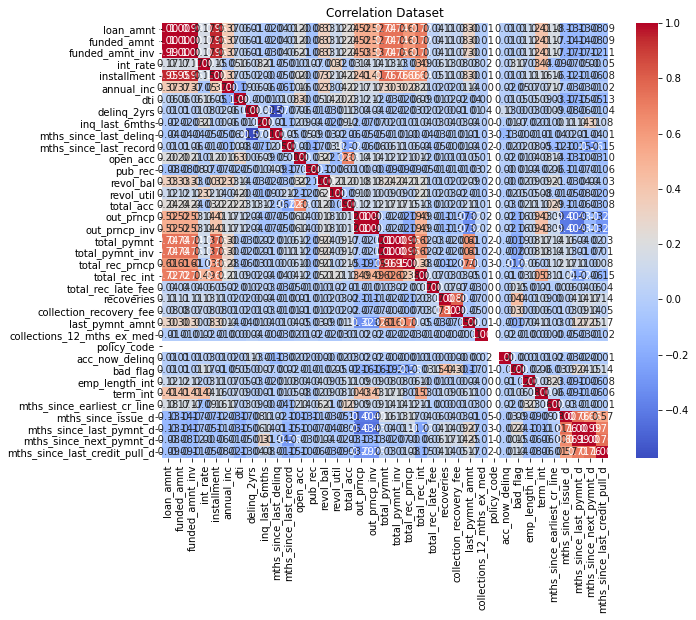

In [47]:
correlation_loan = loan_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_loan, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Dataset')
plt.show()

### Check Cardinality Data

Categorical Data

In [50]:
# Display the number of unique values of features with object data type
print(loan_df.select_dtypes(include='object').nunique())

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64


In [51]:
# Drop three features
loan_df.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

Numerical Data

In [52]:
# Display the number of unique values of features with non-object data type
print(loan_df.select_dtypes(exclude='object').nunique())

loan_amnt                          1352
funded_amnt                        1354
funded_amnt_inv                    9854
int_rate                            506
installment                       55622
annual_inc                        31901
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              145
mths_since_last_record              123
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           112
out_prncp                        135665
out_prncp_inv                    141189
total_pymnt                      351609
total_pymnt_inv                  347659
total_rec_prncp                  172713
total_rec_int                    270249
total_rec_late_fee                 5808
recoveries                        22773
collection_recovery_fee           20275


In [53]:
# Drop 'policy_code' feature
loan_df.drop(['policy_code'], axis=1, inplace=True)

In [54]:
# Display the unique value distribution of each feature
for col in loan_df.select_dtypes(include='object').columns.tolist():
    print("Unique value distribution for", col)
    print(loan_df[col].value_counts(normalize=True) * 100)
    print('\n')

Unique value distribution for grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


Unique value distribution for home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Unique value distribution for verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


Unique value distribution for pymnt_plan
n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


Unique value distribution for purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
va

At this stage, features that are significantly dominated by one value are removed from the dataset. This is done to eliminate features that do not provide variation or additional information in the modeling process.

In [55]:
# Drop 'pymnt_plan' feature from dataset
loan_df.drop('pymnt_plan', axis=1, inplace=True)

### Univariate Analysis

Categorical Data

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')


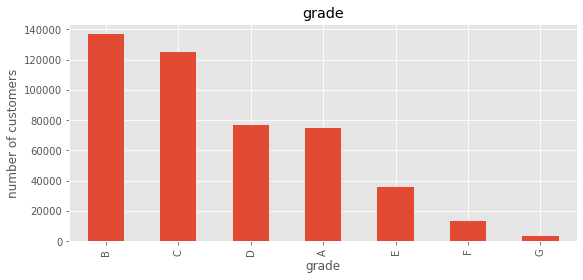

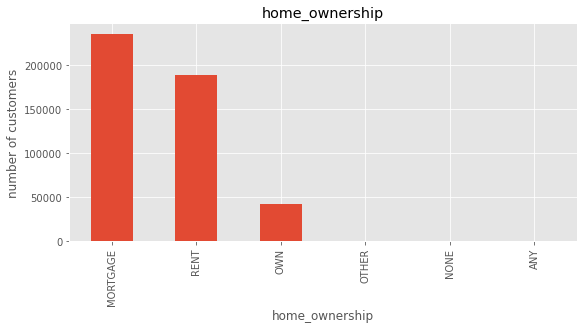

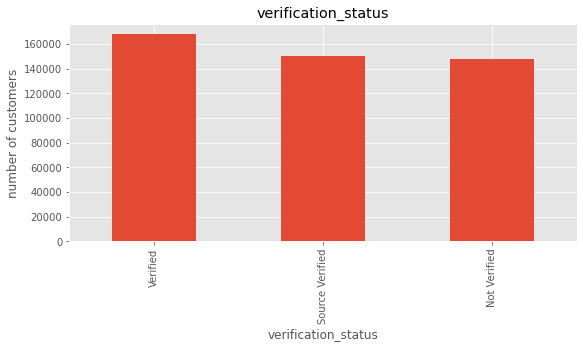

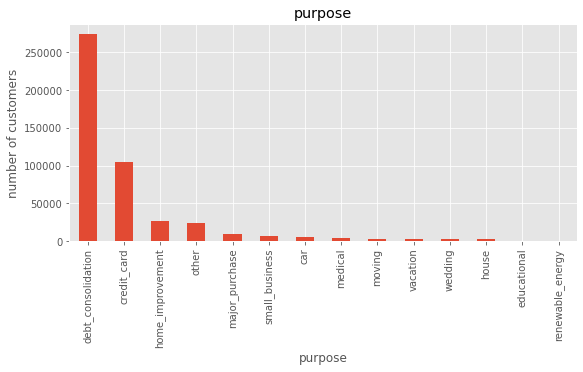

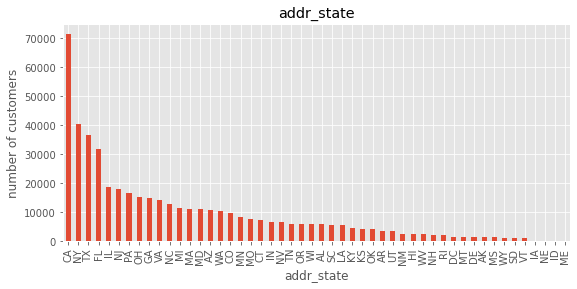

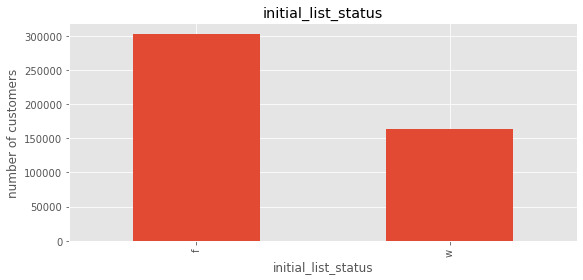

In [56]:
# Identifying the categorical variables
cat_var = loan_df.select_dtypes(include=["object"]).columns
print(cat_var)

# Plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    loan_df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

Numerical Data

In [58]:
# Identifying the numerical variables
num_var = loan_df.select_dtypes(include=np.number)
num_var.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,...,0.0,0.0,0,10.0,36.0,395.0,72.0,35.0,NaN,23.0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,...,0.0,0.0,1,1.0,60.0,224.0,72.0,56.0,NaN,51.0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,...,0.0,0.0,0,10.0,36.0,193.0,72.0,42.0,NaN,23.0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,0.0,0.0,0,10.0,36.0,262.0,72.0,35.0,NaN,35.0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,...,0.0,0.0,0,1.0,60.0,263.0,72.0,23.0,22.0,23.0


<ipython-input-68-eca5baa7f253>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,4))


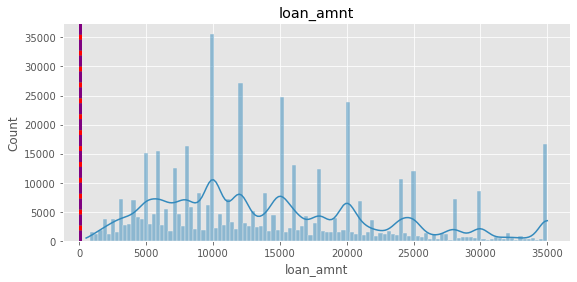

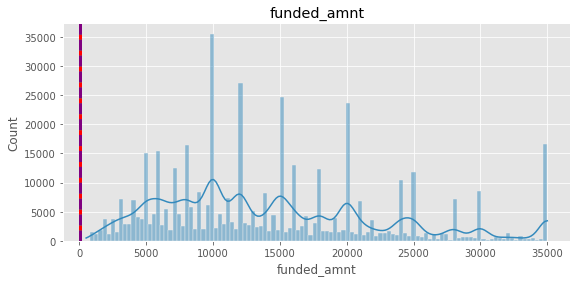

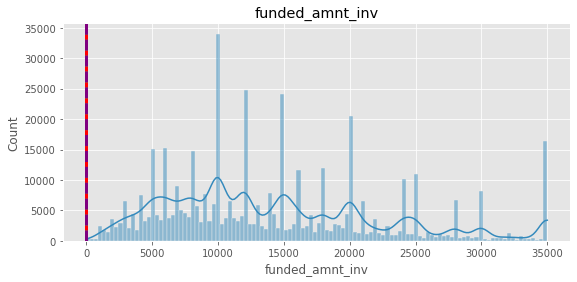

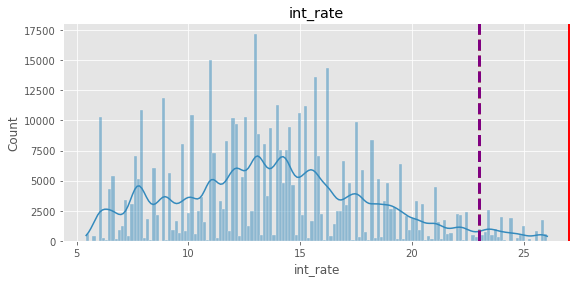

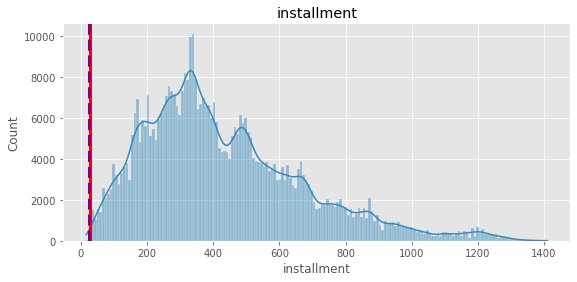

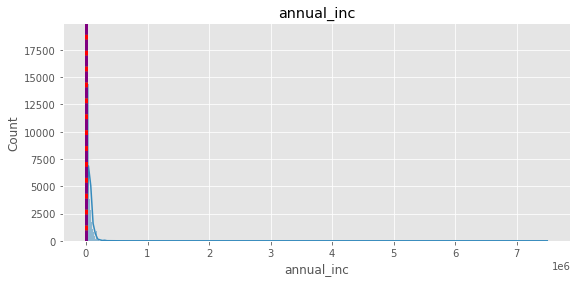

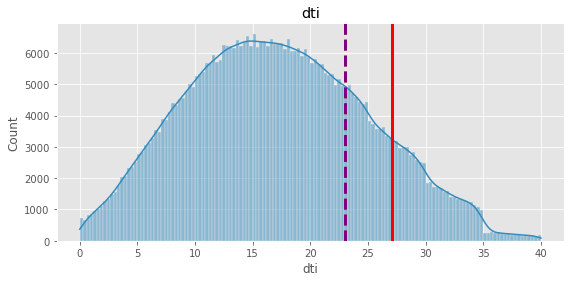

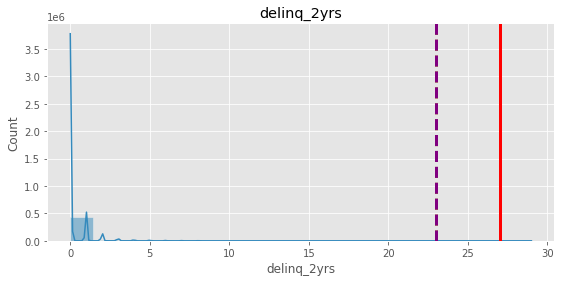

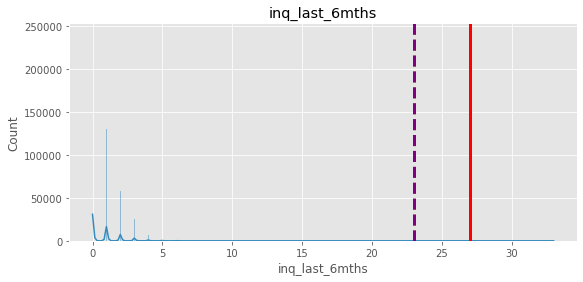

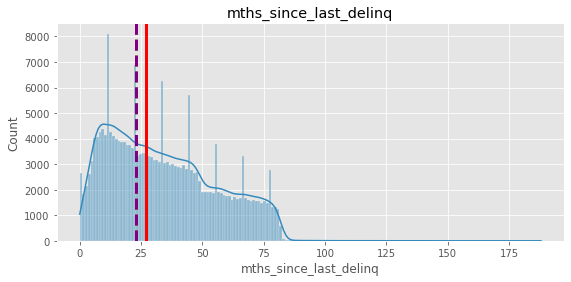

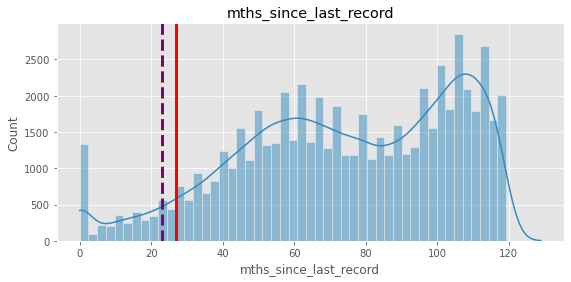

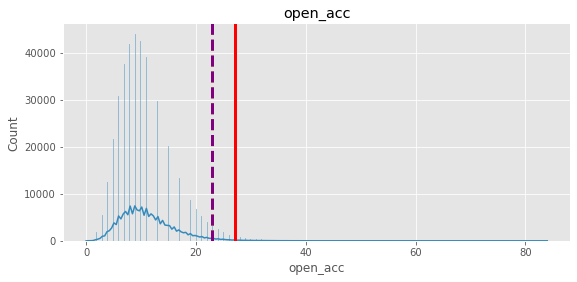

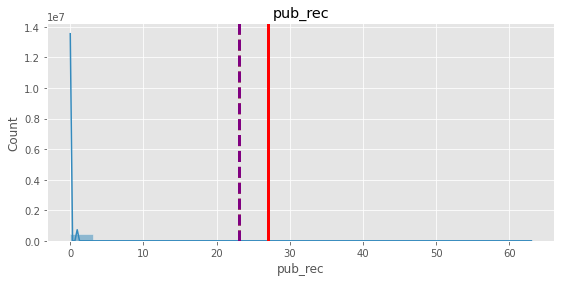

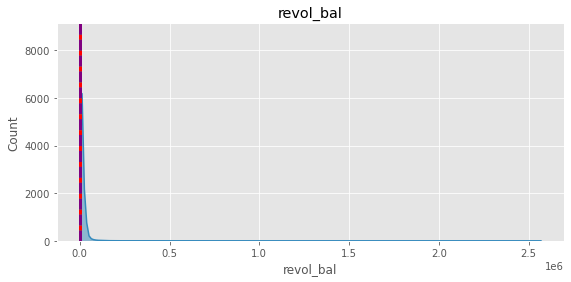

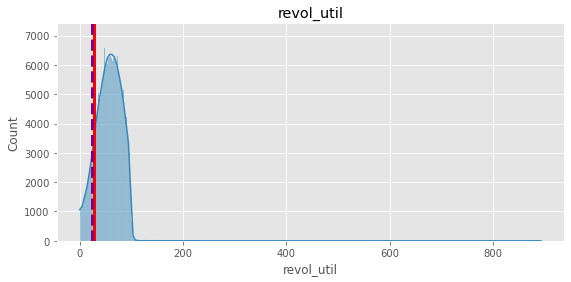

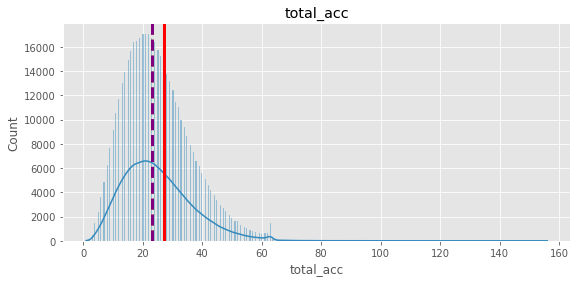

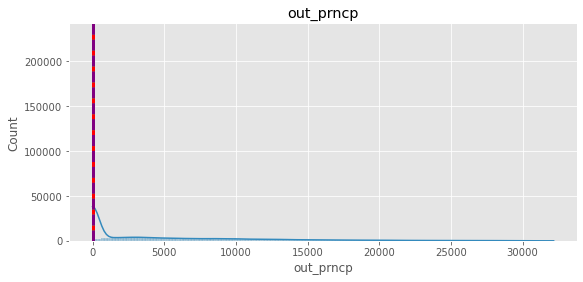

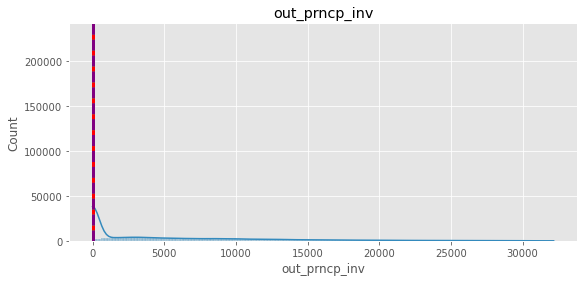

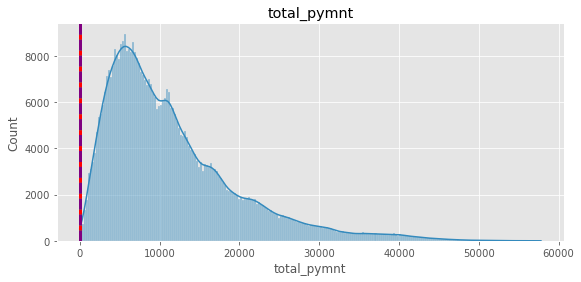

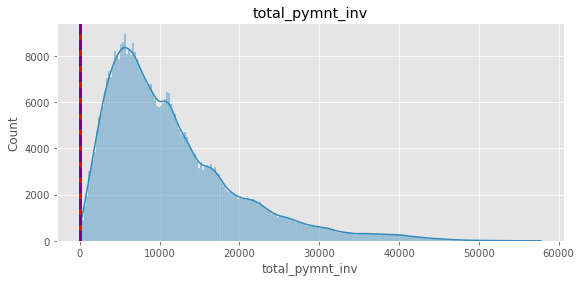

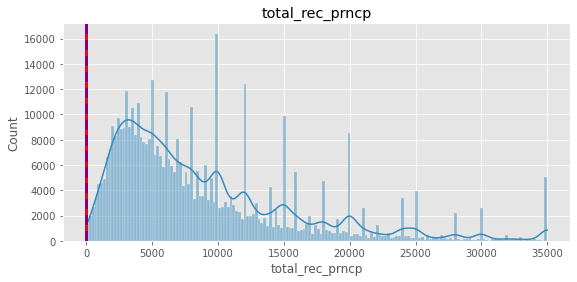

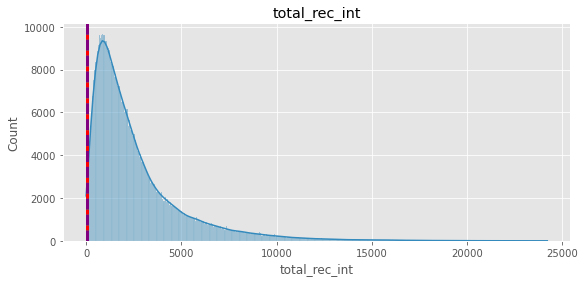

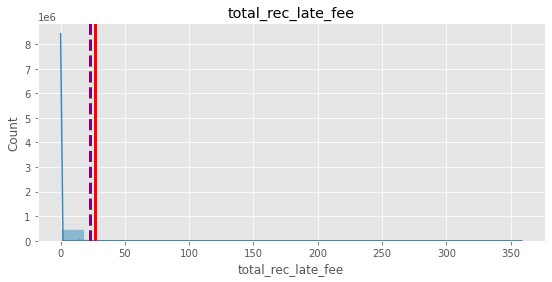

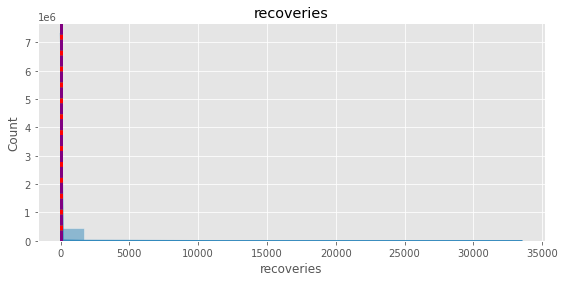

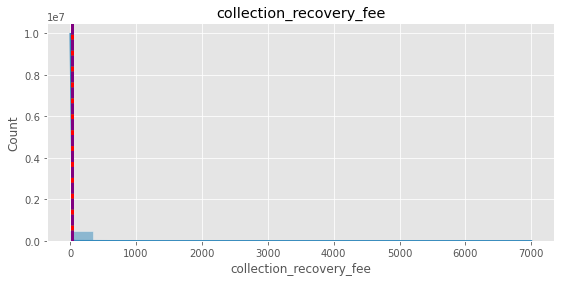

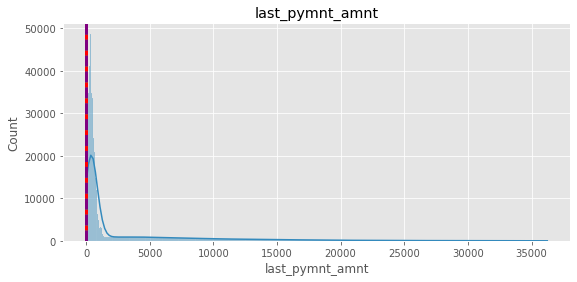

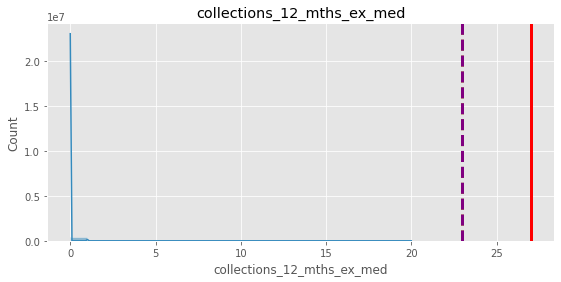

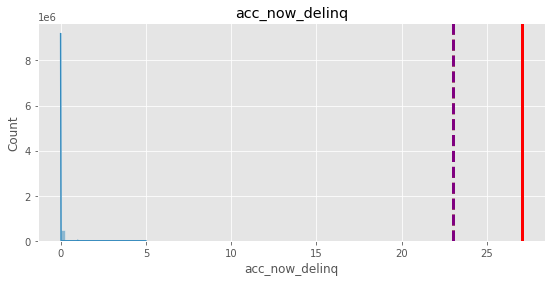

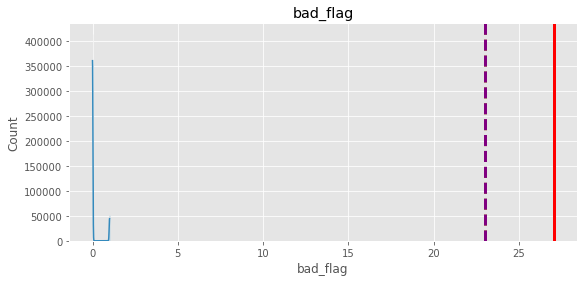

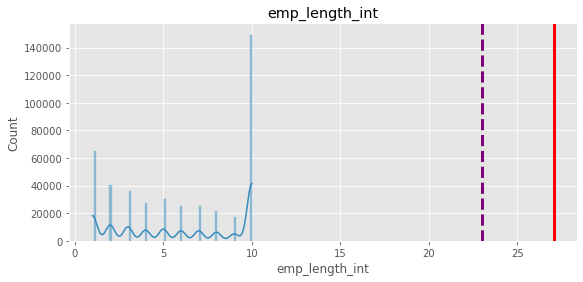

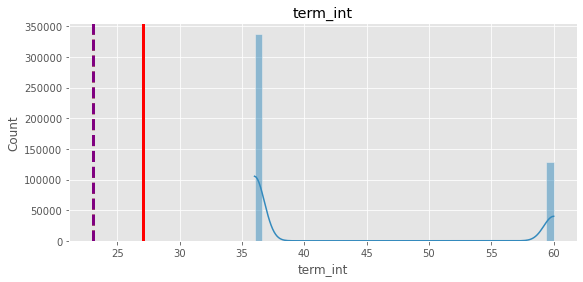

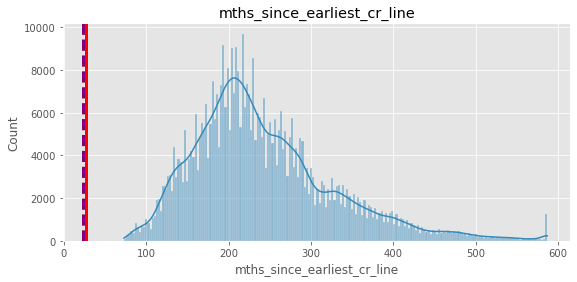

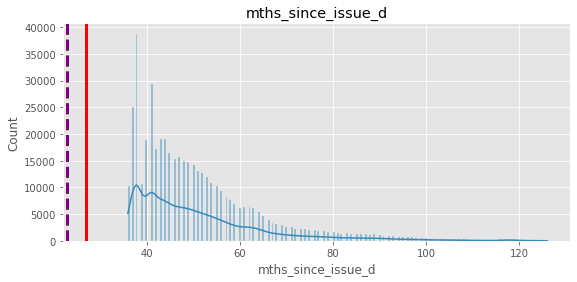

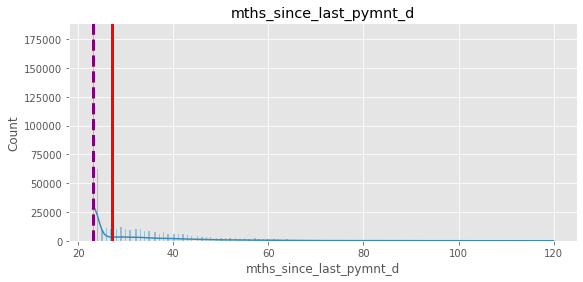

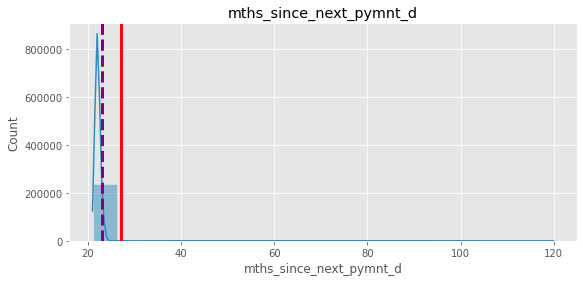

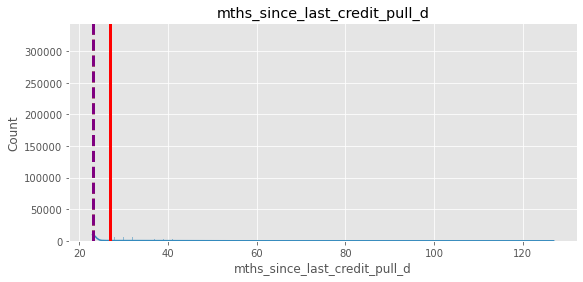

In [68]:
# Plotting histogram for each numerical variable
plt.style.use("ggplot")

for column in loan_df.select_dtypes(exclude='object').columns.tolist():
    # Create subplots for histograms
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.histplot(loan_df[column], kde=True)
    plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
    plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
    plt.axvline(mode, color='purple', linestyle='dashed', linewidth=3, label='Mode')
    plt.title(column)


### Bivariate Analysis

Categorical Data

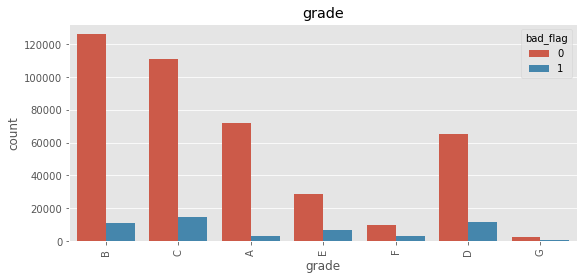

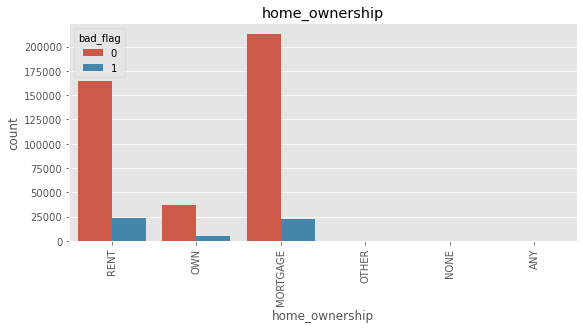

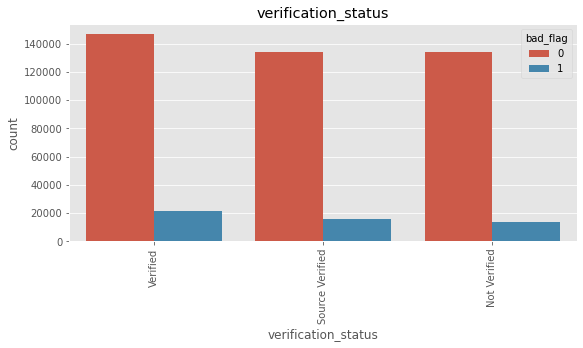

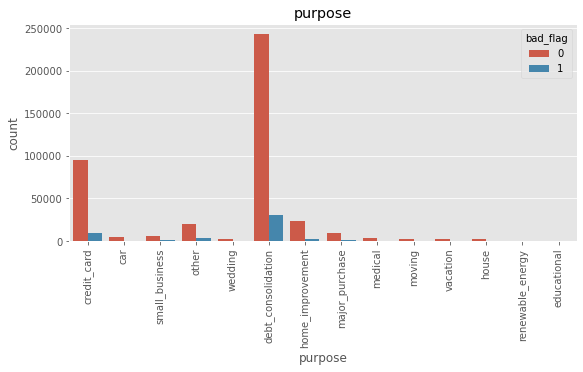

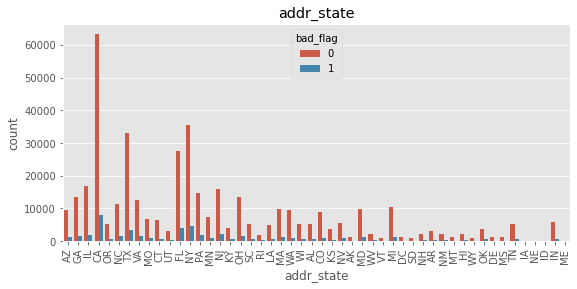

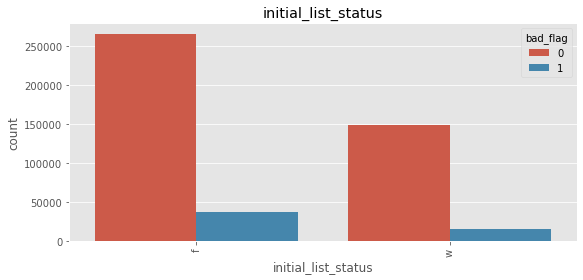

In [69]:
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=loan_df[column], hue=loan_df["bad_flag"])
    plt.title(column)
    plt.xticks(rotation=90)

## Data Preprocessing

### Check Missing Value

In [70]:
# Calculating the percentage of missing values for each feature
check_missing = loan_df.isnull().sum() * 100 / loan_df.shape[0]

# Selects only those features that have missing values
missing_values = check_missing[check_missing > 0].sort_values(ascending=False)

print("Percentage of missing values for each feature")
print(missing_values)

Percentage of missing values for each feature
mths_since_last_record           86.566585
mths_since_last_delinq           53.690554
mths_since_next_pymnt_d          48.728567
emp_length_int                    4.505399
mths_since_last_pymnt_d           0.080637
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
mths_since_last_credit_pull_d     0.009007
mths_since_earliest_cr_line       0.006219
acc_now_delinq                    0.006219
total_acc                         0.006219
pub_rec                           0.006219
open_acc                          0.006219
inq_last_6mths                    0.006219
delinq_2yrs                       0.006219
annual_inc                        0.000858
dtype: float64


In [71]:
loan_df.drop('mths_since_last_record', axis=1, inplace=True)

### Data Imputation

In [75]:
loan_df['annual_inc'].fillna(loan_df['annual_inc'].median(), inplace=True)
loan_df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_df['acc_now_delinq'].fillna(0, inplace=True)
loan_df['total_acc'].fillna(0, inplace=True)
loan_df['pub_rec'].fillna(0, inplace=True)
loan_df['open_acc'].fillna(0, inplace=True)
loan_df['inq_last_6mths'].fillna(0, inplace=True)
loan_df['delinq_2yrs'].fillna(0, inplace=True)
loan_df['collections_12_mths_ex_med'].fillna(0, inplace=True)
loan_df['revol_util'].fillna(0, inplace=True)
loan_df['emp_length_int'].fillna(0, inplace=True)
loan_df['mths_since_last_delinq'].fillna(-1, inplace=True)

### Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for column in cat_var:
    loan_df[column] = label.fit_transform(loan_df[column])

In [77]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,...,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,1,5,24000.0,2,1,...,0.0,0.0,0,10.0,36.0,395.0,72.0,35.0,NaN,23.0
1,2500,2500,2500.0,15.27,59.83,2,5,30000.0,1,0,...,0.0,0.0,1,1.0,60.0,224.0,72.0,56.0,NaN,51.0
2,2400,2400,2400.0,15.96,84.33,2,5,12252.0,0,11,...,0.0,0.0,0,10.0,36.0,193.0,72.0,42.0,NaN,23.0
3,10000,10000,10000.0,13.49,339.31,2,5,49200.0,1,9,...,0.0,0.0,0,10.0,36.0,262.0,72.0,35.0,NaN,35.0
4,3000,3000,3000.0,12.69,67.79,1,5,80000.0,1,9,...,0.0,0.0,0,1.0,60.0,263.0,72.0,23.0,22.0,23.0


### Train Test Split

In [82]:
from sklearn.model_selection import train_test_split

X = loan_df.drop('bad_flag', axis=1)
y = loan_df['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of the training data:", X_train.shape)
print("Shape of the test data:", X_test.shape)

Shape of the training data: (373028, 40)
Shape of the test data: (93257, 40)


### Standardization

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [89]:
X_train_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,1.168205,1.173071,1.178133,-1.131679,1.355115,-1.376964,-0.976953,0.070337,-0.051598,-0.273056,...,-0.425598,-0.082393,-0.057338,-0.769615,-0.615991,1.497384,-0.436287,-0.647752,-0.121861,-0.420048
1,-0.521054,-0.518683,-0.508848,0.115408,-0.364191,0.138807,-0.976953,0.722235,-1.267474,-0.273056,...,-0.498857,-0.082393,-0.057338,0.053398,-0.615991,-0.027594,0.887984,-0.257486,NaN,0.203285
2,0.736841,0.741070,0.747350,-1.131679,0.888957,-1.376964,-0.976953,0.200717,1.164279,-0.273056,...,-0.446033,-0.082393,-0.057338,1.150747,-0.615991,0.861976,0.190999,-0.647752,-0.121861,-0.420048
3,0.347708,0.351362,0.358742,0.634453,0.729506,0.896692,1.097821,-0.562935,-0.051598,-0.273056,...,-0.447534,-0.082393,-0.057338,0.327735,-0.615991,-0.143123,-0.505986,-0.647752,-0.121861,-0.420048
4,-0.714112,-0.712026,-0.816120,-0.226795,-0.614640,0.138807,-0.976953,0.386973,1.164279,0.141794,...,-0.511945,-0.082393,-0.057338,-0.220940,-0.615991,-0.108464,3.466828,4.113502,NaN,-0.420048


In [88]:
X_test_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,2.193827,2.200207,2.202371,0.266987,1.399997,0.138807,-0.976953,-0.153171,1.164279,0.556644,...,4.367944,-0.082393,-0.057338,-1.318289,1.623401,-0.628343,-0.715081,-0.413592,NaN,-0.108382
1,-0.400392,-0.397843,-0.388350,1.644984,-0.552510,1.654577,-0.976953,-0.246299,1.164279,-0.687906,...,-0.509222,-0.082393,-0.057338,1.150747,1.623401,-0.813189,-0.924177,-0.647752,-0.121861,-0.420048
2,1.892174,1.898108,1.901124,0.188901,2.475133,0.138807,-0.976953,1.895652,1.164279,-0.273056,...,4.150222,-0.082393,-0.057338,-1.318289,-0.615991,-0.616790,1.027381,2.162168,NaN,3.112174
3,0.009856,0.013011,0.021346,0.152154,-0.383286,0.138807,-0.976953,-0.134545,-0.051598,-0.273056,...,-0.501803,-0.082393,-0.057338,-1.043952,1.623401,-1.506361,-0.993875,-0.569699,0.041414,-0.420048
4,0.082253,0.085515,0.081595,-1.131679,0.181590,-1.376964,-0.976953,0.219342,1.164279,-0.273056,...,0.889327,-0.082393,-0.057338,1.150747,-0.615991,1.520489,0.469793,0.601101,NaN,-0.420048


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logrec = LogisticRegression()
logrec.fit(X_train_scaled, y_train)

y_train_pred = logrec.predict(X_train_scaled)
y_test_pred = logrec.predict(X_test)

## Evaluation

### ROC-AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = logrec.predict_proba(X_train_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve(AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Training Model')
plt.legend(loc='lower right')
plt.show()